In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# import results

exp_name = '/pool'

res_dir = './results'+exp_name

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(res_dir) if isfile(join(res_dir, f))]



In [9]:
csvs = sorted([f for f in onlyfiles if f.endswith('.csv')])
pkls = sorted([f for f in onlyfiles if f.endswith('.pkl')])

In [10]:
csvs[:15]

['pool_AveragePooling2Dfold_1.csv',
 'pool_AveragePooling2Dfold_2.csv',
 'pool_AveragePooling2Dfold_3.csv',
 'pool_AveragePooling2Dfold_4.csv',
 'pool_AveragePooling2Dfold_5.csv',
 'pool_MaxAvgPooling2Dfold_1.csv',
 'pool_MaxAvgPooling2Dfold_2.csv',
 'pool_MaxAvgPooling2Dfold_3.csv',
 'pool_MaxAvgPooling2Dfold_4.csv',
 'pool_MaxAvgPooling2Dfold_5.csv',
 'pool_MaxPooling2Dfold_1.csv',
 'pool_MaxPooling2Dfold_2.csv',
 'pool_MaxPooling2Dfold_3.csv',
 'pool_MaxPooling2Dfold_4.csv',
 'pool_MaxPooling2Dfold_5.csv']

In [11]:
# first expt
acc_df = pd.DataFrame()
time_df = pd.DataFrame()
i = 0
for c in csvs[:5]:
    df = pd.read_csv(res_dir + '/' + c)
    acc_df = pd.concat([acc_df, df['acc']], axis = 1)
    time_df = pd.concat([time_df, df['time']], axis = 1)
    
ex1 = acc_df.mean(axis = 1)

# second expt
acc_df = pd.DataFrame()
time_df = pd.DataFrame()
i = 0
for c in csvs[5:10]:
    df = pd.read_csv(res_dir + '/' + c)
    acc_df = pd.concat([acc_df, df['acc']], axis = 1)
    time_df = pd.concat([time_df, df['time']], axis = 1)
    
ex2 = acc_df.mean(axis = 1)

# third expt
acc_df = pd.DataFrame()
time_df = pd.DataFrame()
i = 0
for c in csvs[10:15]:
    df = pd.read_csv(res_dir + '/' + c)
    acc_df = pd.concat([acc_df, df['acc']], axis = 1)
    time_df = pd.concat([time_df, df['time']], axis = 1)
    
ex3 = acc_df.mean(axis = 1)

# fourth expt
# acc_df = pd.DataFrame()
# time_df = pd.DataFrame()
# i = 0
# for c in csvs[15:20]:
#     df = pd.read_csv(res_dir + '/' + c)
#     acc_df = pd.concat([acc_df, df['acc']], axis = 1)
#     time_df = pd.concat([time_df, df['time']], axis = 1)
    
# ex4 = acc_df.mean(axis = 1)

In [12]:
plot_df = pd.DataFrame(columns = ['epoch'])
plot_df['epoch'] = [i for i in range(1,21)]
plot_df = pd.concat([plot_df, ex1], axis = 1)
plot_df.rename(columns= {0: 'ex1'}, inplace = True)
plot_df = pd.concat([plot_df, ex2], axis = 1)
plot_df.rename(columns= {0: 'ex2'}, inplace = True)
plot_df = pd.concat([plot_df, ex3], axis = 1)
plot_df.rename(columns= {0: 'ex3'}, inplace = True)
# plot_df = pd.concat([plot_df, ex4], axis = 1)
# plot_df.rename(columns= {0: 'ex4'}, inplace = True)

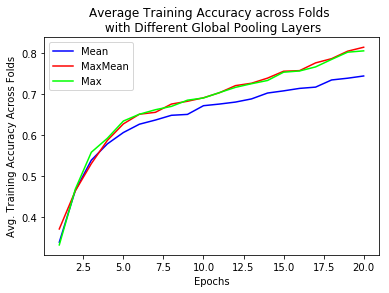

In [40]:
title_str = 'Average Training Accuracy across Folds \n with Different Global Pooling Layers'

ax = plot_df.plot(x = 'epoch', 
                  legend = True,
                  title = title_str,
                  colormap = 'brg')

ax.set_xlabel('Epochs')
ax.set_ylabel('Avg. Training Accuracy Across Folds')
ax.legend(['Mean', 
           'MaxMean', 
           'Max',
           'Adam'])

fig = ax.get_figure()
fig.savefig('pool_lines.pdf', dpi = 600)


In [41]:
a1 = []
for p in pkls[:5]:
    a1.append(np.load(res_dir+ '/' +p))
a2 = []
for p in pkls[5:10]:
    a2.append(np.load(res_dir+ '/' +p))
a3 = []
for p in pkls[10:15]:
    a3.append(np.load(res_dir+ '/' +p))
# a4 = []
# for p in pkls[15:20]:
#     a4.append(np.load(res_dir+ '/' +p))

In [42]:
ex5.shape

(185,)

In [43]:
ex5 = np.asarray(a1).reshape(185)
ex6 = np.asarray(a2).reshape(185)
ex7 = np.asarray(a3).reshape(185)
# ex8 = np.asarray(a4).reshape(185)

In [44]:
ex5_mean = np.mean(ex5)
ex5_std  = np.std(ex5)

ex6_mean = np.mean(ex6)
ex6_std  = np.std(ex6)

ex7_mean = np.mean(ex7)
ex7_std  = np.std(ex7)

# ex8_mean = np.mean(ex8)
# ex8_std  = np.std(ex8)

In [45]:
# Create lists for the plot
expts = ['Avg', 
         'MaxMean', 
         'Max']
x_pos = np.arange(len(expts))
CTEs  = [ex5_mean, ex6_mean, ex7_mean]
error = [ex5_std, ex6_std, ex7_std]

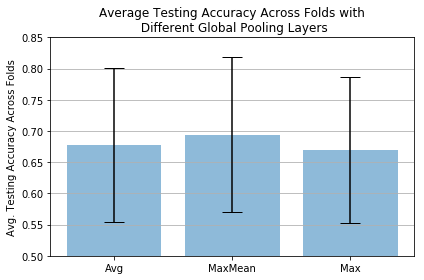

In [46]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Avg. Testing Accuracy Across Folds')
ax.set_xticks(x_pos)
ax.set_xticklabels(expts)
ax.set_title('Average Testing Accuracy Across Folds with\n Different Global Pooling Layers')
ax.set_ylim([0.5,0.85])
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('pool_bar.pdf', dpi = 600)
plt.show()